# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [2]:
#@title Helper functions {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

# Helper functions
def draw_grid(x_lim=np.array([-4, 4]), y_lim=np.array([-4, 4])):
    """Draw an empty grid"""
    ax = plt.gca()
    # Draw ticks and grid
    for i in range(int(x_lim.min()), int(x_lim.max())):
        ax.axvline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([i, i], [0.05, -0.05], color='#2c3e50')
    for i in range(int(y_lim.min()), int(y_lim.max())):
        ax.axhline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([0.05, -0.05], [i, i], color='#2c3e50')
    # x and y axis
    ax.axhline(0, color='#2c3e50', zorder=0)
    ax.axvline(0, color='#2c3e50', zorder=0)
    ax.scatter([0], [0], color='#c0392b', zorder=0)

    ax.grid(False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

def draw_vectors(vectors, origin='origin', cmap=None, labels=None):
    if cmap:
        colors = cmap
    else:
        colors = ['#3498db', '#e67e22', '#f1c40f', '#2ecc71', '#1abc9c']

    if origin == 'origin':
        x_0 = np.zeros(len(vectors))
        y_0 = np.zeros(len(vectors))
    else:
        x_0, y_0 = origin[:, 0], origin[:, 1]
    ax = plt.gca()
    if labels:
        for i in range(len(vectors)):
            ax.text(vectors[i][0]+0.1, vectors[i][1]+0.2, labels[i],
                    {'color': 'black', 'fontsize': 14, 'ha': 'center', 'va': 'center',
                    'bbox': dict(boxstyle="round", fc="white", alpha=0)})
    ax.quiver(x_0, y_0, vectors[:, 0], vectors[:, 1],
              angles='xy', scale_units='xy', scale=1, color=colors)

def projection(x, y):
    color = '#95a5a6'
    ax = plt.gca()
    dot_product = np.dot(x, y)
    y_norm = y / np.dot(y, y)
    x_projection = y_norm * dot_product
    ax.plot((x[0], x_projection[0]), (x[1], x_projection[1]), linestyle='--', linewidth=3, c=color)
    draw_vectors(np.array([x_projection]), cmap=['#bdc3c7'])

def determinant_area(i_hat, j_hat):
    ax = plt.gca()
    sum_vector = i_hat + j_hat
    polygon = plt.Polygon([(0, 0), i_hat, sum_vector, j_hat], fill=True, color='#f39c12', alpha=0.3)
    print('Determinant Area:', np.abs(i_hat[0]*j_hat[1] - i_hat[1]*j_hat[0]))
    ax.add_line(polygon)

## The sigmoid function

$$
\sigma(z) = \frac{1}{1 + e^{-z}} \\
\sigma' = \sigma(1 - \sigma)
$$



* The sigmoid function has the S-shaped curve or sigmoid curve. 
* For any $z \in R$, $\sigma(z)$ returns a value between 0 and 1

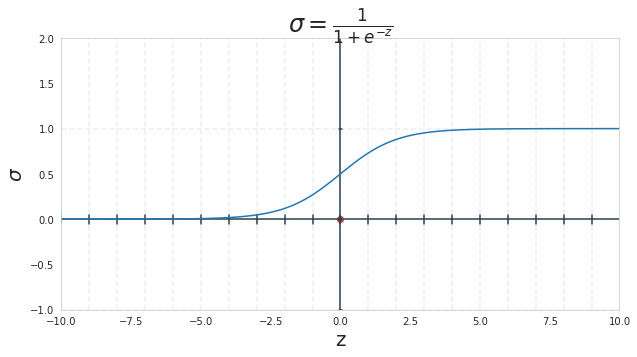

In [3]:
def sigmoid(z):
    return 1./(1 + np.exp(-z))

x = np.linspace(-10, 10, 1000)
y = sigmoid(x)

plt.figure(figsize=(10, 5))
draw_grid(x_lim=np.array([-10, 10]), y_lim=np.array([-1, 2]))
plt.plot(x, y)
plt.title(r'$\sigma = \frac{1}{1+e^{-z}}$', fontsize=24)
plt.xlabel('z', fontsize=20)
plt.ylabel(r'$\sigma$', fontsize=20)
plt.show()

## Logistic Regression Definition

Logistic Regression solves **classification** problems. Logistic Regression assumes that $P(y^{(i)}=1|x^{(i)})$ takes on exactly this form:

$$
P(y^{(i)}=1|x^{(i)}) = \frac{1}{1 + e^{-(w^Tx^{(i)} + b)}} = \hat{y}^{(i)}
$$

so,

$$
P(y^{(i)}=0|x^{(i)}) = 1 - P(y^{(i)}=1|x^{(i)}) = \frac{e^{-(w^Tx^{(i)} + b)}}{1 + e^{-(w^Tx^{(i)} + b)}} = 1 - \hat{y}^{(i)}
$$



**The computation graph**

<div align="center">
    <img src="https://i.imgur.com/pTBwCM2.png" width="600" />
</div>


For one sample $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = \sigma(z^{(i)})\tag{2}$$ 

For the entire dataset:

$$Z = X@w + b \tag{3} $$
$$\hat{y} = \sigma(Z) = \sigma(X@w + b) \tag{4} $$


## Cost function



**The loss function**

$$
Cost function = J(w, b) = -\frac{1}{m}\sum_{i=1}^m{ \Big( y^{(i)} log( \hat{y}^{(i)}) + (1-y^{(i)}) log(1 - \hat{y}^{(i)}) \Big)}
$$

is also called **binary cross entropy**.

![](https://miro.medium.com/max/3128/0*JRbkNpnepqQCtL7X)


Note that $h(x)$ is $\hat{y}$, or the prediction (output) of your classification model

The benefits of taking the logarithm reveal themselves when you look at the cost function graphs for y=1 and y=0. These smooth monotonic functions (always increasing or always decreasing) make it easy to calculate the gradient and minimize cost. 
![](http://wiki.fast.ai/images/f/f4/Y1andy2_logistic_function.png)

**Question**: Reimplement log loss using python

In [ ]:
# p: probability of positive class
y_hat = np.array([0.99,0.99,0.01,0.01,0.5,0.5])
y_label = np.array([ 1,   0,   0,   1,  0,  1])

# question: reimplement this function above using 2 ways. Note: you can use np.log
# 1st way: using for loop
total_loss = 0
for y_i,y_hat_i in zip(y_label,y_hat):
    # your code here
    pass

In [ ]:
# 2nd way: without for loops, aka using numpy directly (1 to 2 lines of code)


1.7694559008005124

## Gradient Descent

**Forward Propagation:**
$$Z = Xw + b$$
$$\hat{y} = \sigma(Z) =\sigma(Xw + b) $$
$$J(w, b) = -\frac{1}{m}\sum_{i=1}^m{ \Big( y^{(i)} log( \hat{y}^{(i)}) + (1-y^{(i)}) log(1 - \hat{y}^{(i)}) \Big)} \tag{5}$$

**and Backward**

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X^T(\hat{y}-y)\tag{6}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)}-y^{(i)})\tag{7}$$

**Discussion**: Prove the fomulas (6) and (7)

**Prove (6)**:

$$
\frac{dJ}{dw_j} = \frac{dJ}{d\hat{y}}.\frac{d\hat{y}}{dZ}.\frac{dZ}{dw_j}
$$

For $j \in {1 \dots n}$

Solving $\frac{dJ}{d\hat{y}}$:

$$
\frac{dJ}{d\hat{y}} = \frac{-1}{m} \sum_{i=1}^m {\frac{y^{(i)}}{\hat{y}^{(i)}} - \frac{(1-y^{(i)})}{1-\hat{y}^{(i)}}} \\
\Rightarrow \frac{dJ}{d\hat{y}} = \frac{-1}{m} \sum_{i=1}^m {\frac{y^{(i)}(1-\hat{y}^{(i)}) - (1-y^{(i)})\hat{y}^{(i)}}{\hat{y}^{(i)}(1-\hat{y}^{(i)})}} \\
$$

$$
\Rightarrow \frac{dJ}{d\hat{y}} = \frac{-1}{m} \sum_{i=1}^m {\frac{y^{(i)} - \hat{y}^{(i)}}{\hat{y}^{(i)}(1-\hat{y}^{(i)})}} \tag{8} \\
$$

Solving $\frac{d\hat{y}}{dZ}$:

$$
\frac{d\hat{y}}{dZ} = \hat{y}(1 - \hat{y}) \tag{9}
$$

because $\hat{y} = sigmoid(Z)$

Solving $\frac{dZ}{dw_j}$:

$$
\frac{dZ}{dw_j} = x_j
$$

So,

$$
\frac{dJ}{dw_j} = \frac{dJ}{d\hat{y}}.\frac{d\hat{y}}{dZ}.\frac{dZ}{dw_j} \\
\Rightarrow \frac{dJ}{dw_j} = \frac{-1}{m} \sum_{i=1}^m {\frac{y^{(i)} - \hat{y}^{(i)}}{\hat{y}^{(i)}(1-\hat{y}^{(i)})} \hat{y}^{(i)}(1 - \hat{y}^{(i)}) x^{(i)}_j } = \frac{-1}{m} \sum_{i=1}^m {(y^{(i)} - \hat{y}^{(i)}) x^{(i)}_j } \\
\Rightarrow \frac{dJ}{dw} = \frac{1}{m}X^T(\hat{y}-y)
$$

**Prove (7):**

$$
\frac{dJ}{db} = \frac{dJ}{d\hat{y}}.\frac{d\hat{y}}{dZ}.\frac{dZ}{db}
$$

Because

$$
\frac{dZ}{db} = 1
$$

and based on (8) and (9), we have

$$
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)}-y^{(i)})
$$

**Question**: With Logistic Regression, can you fill in the information for each circle (or box) similar to what we did in Linear Regression?

![](https://i.imgur.com/cp7uxUq.png)

## Implement with sklearn

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, n_features=2, centers=2, random_state=102)
X.shape,y.shape

((50, 2), (50,))

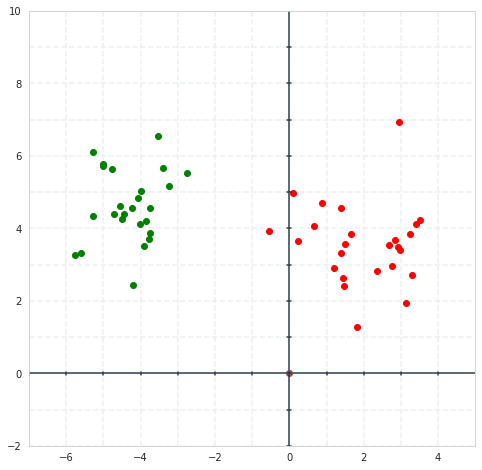

In [ ]:
plt.figure(figsize=(8, 8))
draw_grid(x_lim=np.array([-7, 5]), y_lim=np.array([-2, 10]))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='r', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='g', label='Class +1')

## Metric vs Loss function

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss

# Create Logistics Regression model from X and y
lg = LogisticRegression()
lg.fit(X, y)
predictions = lg.predict(X)
predictions_proba = lg.predict_proba(X)
# Show loss
print("Log loss: %f" % log_loss(y, predictions_proba))
# Show metrics
print("Accuracy score: %f" % accuracy_score(y, predictions))

# Show parameters
print('w = ', lg.coef_)
print('b = ', lg.intercept_)

Log loss: 0.017568
Accuracy score: 1.000000
w =  [[-1.6088516   0.26800105]]
b =  [-3.52428733]


In [ ]:
predictions_proba[:5]

array([[1.69076974e-03, 9.98309230e-01],
       [9.99627384e-01, 3.72615916e-04],
       [9.99229479e-01, 7.70520700e-04],
       [9.99698093e-01, 3.01906808e-04],
       [9.11594267e-01, 8.84057330e-02]])

In [ ]:
predictions[:5]

array([1, 0, 0, 0, 0])

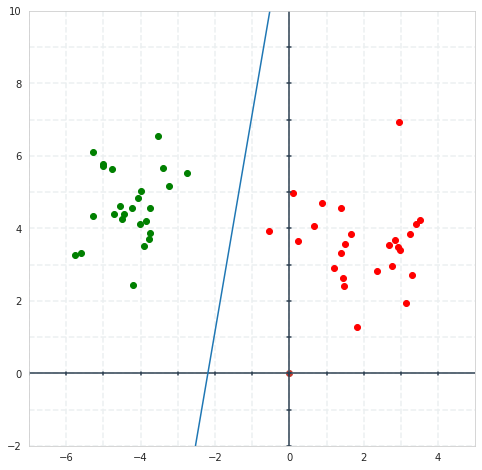

In [ ]:
# Plot the decision boundary
w = lg.coef_[0]
b = lg.intercept_[0]
plt.figure(figsize=(8, 8))
draw_grid(x_lim=np.array([-7, 5]), y_lim=np.array([-2, 10]))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='r', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='g', label='Class +1')
x_1 = np.linspace(-8, 8, 100)
plt.plot(x_1, (-w[0]/w[1])*x_1 + (-b/w[1]))

## Classification Model Evaluation - The Confusion Matrix

A confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm.

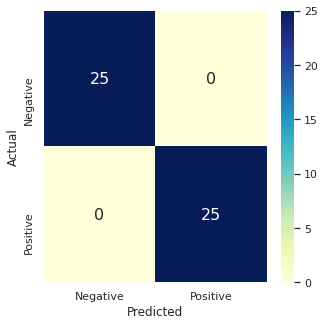

In [ ]:
data = confusion_matrix(y, predictions)
df_cm = pd.DataFrame(data, columns=np.unique(['Negative', 'Positive']), 
                     index = np.unique(['Negative', 'Positive']))
# print(df_cm)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="YlGnBu", annot=True,annot_kws={"size": 16})# font size

**Type 1 and Type 2 errors**

![alt text](https://www.statisticssolutions.com/wp-content/uploads/2017/12/rachnovblog.jpg)

source: https://www.statisticssolutions.com/to-err-is-human-what-are-type-i-and-ii-errors/

Type 1 error is also known as False Positive, or FP (predict Positive, but actual label is Negative)

Type 2 error is also known as False Negative, or FN (predict Negative, but actual label is Positive)

**Question**: given a list of **binary classification** problems below, determine which type of error we should avoid for each of the problem
- Cancer detection
- Covid test
- Fraud detection
- Email spam filter
- Predicting potential students in school
- Crime detection

Can you think of any example of type 1 error or type 2 error that you should reduce?



### Terminologies

**Recall, sensitivity, hit rate, or true positive rate(TPR)**

$$
TPR = \frac{TP}{P} = \frac{TP}{TP + FN}
$$

**precision or positive predictive value (PPV)**

$$
PPV = \frac{TP}{TP + FP}
$$

**accuracy (ACC)**

$$
ACC = \frac{TP + TN}{P + N}
$$

**F1 score**: the **harmonic mean** of **precision** and **recall**

$$
F_1 = 2 \frac{Precision . Recall}{Precision + Recall}
$$

**F-beta score**: The general formula for positive real β, where β is chosen such that recall is considered β times as important as precision

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/136f45612c08805f4254f63d2f2524bc25075fff)

In [ ]:
# sklearn classification_report
from sklearn.metrics import classification_report

# question 1
y_true = [1, 1, 1, 0, 0, 1] # label
y_pred = [0, 1, 1, 1, 0, 0] # prediction

# Calculate: False Positive, False Negative, Precision, Recall, F1 score, Accuracy
# FP:
# FN:
# Precision:
# Recall: 
# F1: 
# Accuracy: 

# question 2
y_true = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1]
y_pred = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

# Calculate: False Positive, False Negative, Precision, Recall, F1 score, Accuracy
# FP: 
# FN: 
# Precision:
# Recall: 
# F1
# Accuracy

print(classification_report(y_true, y_pred))

In [ ]:
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(['Negative','Positive']), 
                     index = np.unique(['Negative','Positive']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="YlGnBu", annot=True,annot_kws={"size": 16})# font size